<a href="https://colab.research.google.com/github/bojiix/RAM-OSI-BAN-AI/blob/rogoz/pr_sd_ra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import string
import matplotlib.pyplot as plt
import seaborn as sns
import tracemalloc
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SD2021/cardio_train.csv',sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Numarul total de persoane, separate dupa gen.

---

In [ ]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

  Pentru a afla daca valoarea 1 din coloana 'gender' reprezinta genul feminin sau masculin vom calcula inaltimea medie a celor doua genuri. De asemenea, vom tine cont de presupunerea ca, in medie, inaltimea barbatilor este mai mare decat cea a femeilor.

In [180]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Am extras submultimea formata din coloanele 'gender' si 'height', unde 'gender' are rol de index si 'height' este valoarea acesteia. Pentru a obtine valoarea medie a inaltimii, am aplicat functia mean() asupra submultimii obtinute.                                  
Din rezultatul obtinut si tinand cont de presupunerea mentionata anterior, putem presupune ca valoarea 1 din coloana 'gender' reprezinta genul feminin, deoarece valoarea media a acesteia este mai mica decat cea a valorii 2.

Diferite statistici in functie de gen

---

In [ ]:
gender_stats = df.groupby('gender')['alco','smoke','gluc','cholesterol']
gender_stats.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,alco,smoke,gluc,cholesterol
gender,,,,
1,0.025500,0.017856,1.235054,1.384735
2,0.106375,0.218880,1.210462,1.333633


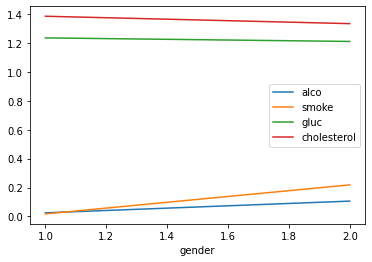

In [ ]:
gender_stats.mean().plot()

In [ ]:
gender_stats.filter(lambda x: x['alco'].mean() > x['smoke'].mean())

,alco,smoke,gluc,cholesterol
1,0,0,1,3
2,0,0,1,3
4,0,0,1,1
5,0,0,2,2
6,0,0,1,3
...,...,...,...,...
69993,0,0,1,1
69994,0,0,1,1
69996,0,0,2,2
69998,0,0,2,1


In [ ]:
gender_stats.agg({'alco': 'std', 'smoke': 'std','gluc':'std','cholesterol':'std'})

,alco,smoke,gluc,cholesterol
gender,,,,
1,0.157639,0.132431,0.582956,0.693417
2,0.308323,0.413496,0.551493,0.653764



Persoane cu boli cardiace, pe grupe de varsta

---



In [ ]:
df.groupby('gender')['age'].min()/365

gender
1    29.750685
2    29.583562
Name: age, dtype: float64

In [ ]:
df.groupby('gender')['age'].max()/365

gender
1    64.934247
2    64.967123
Name: age, dtype: float64

Deoarece am grupat coloana 'age' dupa gen, am aflat valoarea minima si maxima de varsta. Folosind aceasta informatie, am stabilit ca valoare coloanei 'age' va fi cuprinsa intre 29 si 64 de ani.

In [ ]:
def age_func(x):
  if (x < 30.0) & (x >= 20.0):
    return '20s'
  elif (x < 40.0) & (x >= 30.0):
    return '30s'
  elif (x < 50.0) & (x >= 40.0):
    return '40s'
  elif (x < 60.0) & (x >= 50.0):
    return '50s'
  elif (x < 70.0) & (x >= 60.0):
    return '60s'


Am definit functia age_func(), care va ajuta la stabilirea categoriei de varsta. Categoriile de varsta sunt: 
* 20s (varsta cuprinsa intre 20 -> 29 de ani)
* 30s (varsta cuprinsa intre 30 -> 39 de ani)
* 40s (varsta cuprinsa intre 40 -> 49 de ani)
* 50s (varsta cuprinsa intre 50 -> 59 de ani)
* 60s (varsta cuprinsa intre 60 -> 69 de ani)

In [ ]:
ages = [] 
#print(len(ages))
for i, j in df['age'].iteritems():
    ages.append(age_func(df['age'][i]/365))
#print(ages)
df['age_cat']=ages

In lista ages am salvat categoriile de varsta pentru fiecare intrare din coloana 'age', dupa care am atribuit valorile din lista noii coloane 'age_cat'.

In [155]:
tb1 = df.pivot_table(values='id',index='age_cat',columns='cardio', aggfunc=len, fill_value=0)
tb1

cardio,0,1
age_cat,,
20s,3,0
30s,1349,432
40s,12177,7448
50s,17186,18355
60s,4306,8744


Prin folosirea functiei pivot_table, am creat tabelul pivot ce evidentiaza numarul de persoane cardiace pe grupe de varsta. 

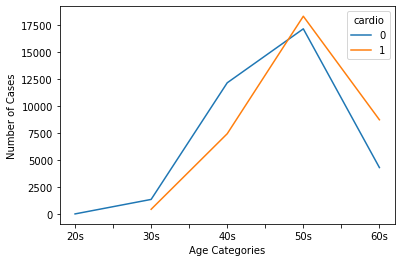

In [ ]:
tb1.plot(xlabel="Age Categories", ylabel="Number of Cases")

Persoane cu tensiunea normala, pe categorii de varsta

---

In [163]:
#df[(df.v3 == some_value) & (df.v4 == some_value)].pivot_table(index='v1', columns='A', values='v3', aggfunc='count')
tb2 = df[((df.ap_hi >= 120) & (df.ap_hi <= 121) & (df.ap_lo >= 79) & (df.ap_lo <= 80) & (df['age_cat'] == '20s')) |
   ((df.ap_hi >= 122) & (df.ap_hi <= 123) & (df.ap_lo >= 81) & (df.ap_lo <= 82) & (df['age_cat'] == '30s')) |
   ((df.ap_hi >= 124) & (df.ap_hi <= 127) & (df.ap_lo >= 83) & (df.ap_lo <= 84) & (df['age_cat'] == '40s')) |
   ((df.ap_hi >= 128) & (df.ap_hi <= 131) & (df.ap_lo >= 85) & (df.ap_lo <= 86) & (df['age_cat'] == '50s')) |
   ((df.ap_hi >= 132) & (df.ap_hi <= 134) & (df.ap_lo >= 87) & (df.ap_lo <= 88) & (df['age_cat'] == '60s'))
   ].pivot_table(values=['ap_hi',	'ap_lo',	'alco','smoke','gluc','cholesterol','active','cardio'],index='age_cat', aggfunc='mean') 
tb2


,active,alco,ap_hi,ap_lo,cardio,cholesterol,gluc,smoke
age_cat,,,,,,,,
20s,1.00,0.00,120.00,80.00,0.00,1.00,1.00,0.00
40s,0.75,0.00,125.50,83.50,0.00,1.00,1.00,0.00
50s,0.86,0.12,129.94,85.06,0.62,1.58,1.36,0.08


In [179]:
df[((df.ap_hi >= 120) & (df.ap_hi <= 121) & (df.ap_lo >= 79) & (df.ap_lo <= 80) & (df['age_cat'] == '20s')) |
   ((df.ap_hi >= 122) & (df.ap_hi <= 123) & (df.ap_lo >= 81) & (df.ap_lo <= 82) & (df['age_cat'] == '30s')) |
   ((df.ap_hi >= 124) & (df.ap_hi <= 127) & (df.ap_lo >= 83) & (df.ap_lo <= 84) & (df['age_cat'] == '40s')) |
   ((df.ap_hi >= 128) & (df.ap_hi <= 131) & (df.ap_lo >= 85) & (df.ap_lo <= 86) & (df['age_cat'] == '50s')) |
   ((df.ap_hi >= 132) & (df.ap_hi <= 134) & (df.ap_lo >= 87) & (df.ap_lo <= 88) & (df['age_cat'] == '60s'))
   ].groupby('age_cat')['ap_hi',	'ap_lo',	'alco','smoke','gluc','cholesterol','active','cardio']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Persoane cu tensiunea mica, pe categorii de varsta

---

In [ ]:
tb3 = df[((df.ap_hi < 120)  & (df.ap_lo < 81) & (df['age_cat'] == '20s')) | 
   ((df.ap_hi < 122)  & (df.ap_lo < 81) & (df['age_cat'] == '30s')) | 
   ((df.ap_hi < 124)  & (df.ap_lo < 83) & (df['age_cat'] == '40s')) | 
   ((df.ap_hi < 128)  & (df.ap_lo < 85) & (df['age_cat'] == '50s')) |
   ((df.ap_hi < 132)  & (df.ap_lo < 87) & (df['age_cat'] == '60s')) 
].pivot_table(values=['gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'alco','smoke','gluc','cholesterol','active','cardio'],index='age_cat',aggfunc='mean')
tb3

,active,alco,ap_hi,ap_lo,cardio,cholesterol,gender,gluc,height,smoke,weight
age_cat,,,,,,,,,,,
20s,1.000000,0.000000,100.000000,60.000000,0.000000,1.000000,2.000000,1.000000,175.000000,0.000000,92.000000
30s,0.810994,0.062500,112.681476,74.216114,0.113705,1.134789,1.365211,1.115964,164.675452,0.096386,69.527711
40s,0.814712,0.051831,114.044613,75.249942,0.207940,1.162559,1.356523,1.127774,164.934117,0.096214,70.361814
50s,0.799928,0.042928,116.041641,76.594863,0.340025,1.254581,1.309039,1.189211,164.282891,0.072061,71.313913
60s,0.793216,0.035194,119.244806,77.277880,0.548551,1.398021,1.352226,1.265583,163.706290,0.063887,72.393018


Persoane cu tensiunea mare, pe categorii de varsta

---

In [ ]:
tb4 = df[((df.ap_hi > 121)  & (df.ap_lo > 80) & (df['age_cat'] == '20s')) |
   ((df.ap_hi > 123)  & (df.ap_lo > 82) & (df['age_cat'] == '30s')) |
   ((df.ap_hi > 127)  & (df.ap_lo > 84) & (df['age_cat'] == '40s')) |
   ((df.ap_hi > 131)  & (df.ap_lo > 86) & (df['age_cat'] == '50s')) |
   ((df.ap_hi > 134)  & (df.ap_lo > 88) & (df['age_cat'] == '60s')) 
].pivot_table(values=['gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'alco','smoke','gluc','cholesterol','active','cardio'],index='age_cat',aggfunc='mean')
tb4

,active,alco,ap_hi,ap_lo,cardio,cholesterol,gender,gluc,height,smoke,weight
age_cat,,,,,,,,,,,
30s,0.774809,0.087786,144.484733,134.851145,0.751908,1.366412,1.435115,1.202290,166.885496,0.148855,83.463740
40s,0.806475,0.080576,149.360671,145.664748,0.808153,1.448201,1.429257,1.218945,165.712950,0.126619,80.548050
50s,0.815247,0.064081,153.905966,155.798183,0.833047,1.596244,1.364964,1.321016,164.087405,0.094525,79.892022
60s,0.804839,0.057258,151.564247,142.701344,0.850000,1.655914,1.370968,1.339247,163.056183,0.081452,78.451667


In [ ]:
tb5 = df[((df.ap_hi < 120)  & (df.ap_lo < 81) & (df['age_cat'] == '20s')) | ((df.ap_hi > 121)  & (df.ap_lo > 80) & (df['age_cat'] == '20s')) |
   ((df.ap_hi < 122)  & (df.ap_lo < 81) & (df['age_cat'] == '30s')) | ((df.ap_hi > 123)  & (df.ap_lo > 82) & (df['age_cat'] == '30s')) |
   ((df.ap_hi < 124)  & (df.ap_lo < 83) & (df['age_cat'] == '40s')) | ((df.ap_hi > 127)  & (df.ap_lo > 84) & (df['age_cat'] == '40s')) |
   ((df.ap_hi < 128)  & (df.ap_lo < 85) & (df['age_cat'] == '50s')) | ((df.ap_hi > 131)  & (df.ap_lo > 86) & (df['age_cat'] == '50s')) |
   ((df.ap_hi < 132)  & (df.ap_lo < 87) & (df['age_cat'] == '60s')) 
].pivot_table(values=['gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'alco','smoke','gluc','cholesterol','active','cardio'],index='age_cat',aggfunc='mean')
tb5

,active,alco,ap_hi,ap_lo,cardio,cholesterol,gender,gluc,height,smoke,weight
age_cat,,,,,,,,,,,
20s,1.000000,0.000000,100.000000,60.000000,0.000000,1.000000,2.000000,1.000000,175.000000,0.000000,92.000000
30s,0.805031,0.066667,117.922013,84.207547,0.218868,1.172956,1.376730,1.130189,165.039623,0.105031,71.824088
40s,0.812714,0.058803,122.610190,92.328389,0.353516,1.231839,1.374164,1.149887,165.123015,0.103589,72.832389
50s,0.804453,0.049177,127.227642,99.993363,0.485675,1.355516,1.325560,1.228150,164.225140,0.078697,73.848086
60s,0.793216,0.035194,119.244806,77.277880,0.548551,1.398021,1.352226,1.265583,163.706290,0.063887,72.393018


(array([1., 0., 0., 0., 1., 0., 1., 0., 1., 1.]),
 array([60.        , 63.99933633, 67.99867266, 71.99800899, 75.99734533,
        79.99668166, 83.99601799, 87.99535432, 91.99469065, 95.99402698,
        99.99336331]),
 <a list of 10 Patch objects>)

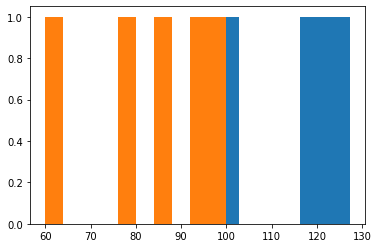

In [122]:
plt.hist(tb5['ap_hi'])
plt.hist(tb5['ap_lo'])

Inceput incercari

In [ ]:
df.groupby(['age_cat','cardio']).size().unstack()


cardio,0,1
age_cat,,
20s,3.0,NaN
30s,1349.0,432.0
40s,12177.0,7448.0
50s,17186.0,18355.0
60s,4306.0,8744.0


Text(0, 0.5, 'Number of Cases')

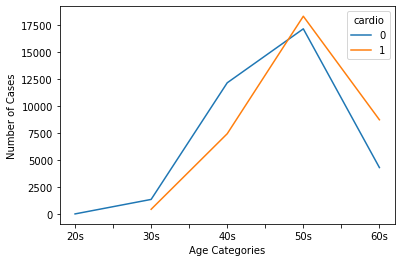

In [ ]:
ax = df.groupby(['age_cat','cardio']).size().unstack().plot()
ax.set_xlabel("Age Categories")
ax.set_ylabel("Number of Cases")

In [ ]:
df.groupby(['cardio','age_cat']).agg({'ap_hi':'count','ap_lo':'count'})

ap_hi  ap_lo
cardio age_cat              
0      20s          3      3
       30s       1349   1349
       40s      12177  12177
       50s      17186  17186
       60s       4306   4306
1      30s        432    432
       40s       7448   7448
       50s      18355  18355
       60s       8744   8744

In [ ]:
df.groupby(['age_cat'])['id'].count()

age_cat
20.0        3
30.0     1781
40.0    19625
50.0    35541
60.0    13050
Name: id, dtype: int64

In [ ]:
df.groupby('gender').agg({'alco':'sum','smoke':'sum','active':'sum','cardio':'sum'})

,alco,smoke,active,cardio
gender,,,,
1,1161,813,36516,22616
2,2603,5356,19745,12363


In [ ]:
df.groupby('gender').agg({'weight':'min', 'height':'min', 'age':'min'})

,weight,height,age
gender,,,
1,21.0,55,10859
2,10.0,65,10798


In [ ]:
df.groupby('gender').agg({'weight':'max', 'height':'max', 'age':'max'})

,weight,height,age
gender,,,
1,200.0,250,23701
2,200.0,207,23713


In [ ]:
df.groupby('gender').agg({"age":['min','max','mean']})

age                     
          min    max          mean
gender                            
1       10859  23701  19510.124577
2       10798  23713  19392.097875

In [ ]:
df.groupby('age_cat')['id']